<a href="https://colab.research.google.com/github/Eldow227/Linear-Regression/blob/main/tips_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description:

Goal of this project is to present my skills in creating efficient Regression model.
As an example I will try to predict value of tip that waiter gets accordingly to information we have about him. 
The dataset I upload comes from seaborn library, it has information about waiter and customer.

**1. Importing necessary libraries and dataset**

 At the beginning I import all necessary libraries and upload tips dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = sns.load_dataset('tips')

Ok, so we have our data uploaded. It would be nice to see what we are dealing with. Let's have a look.




In [ ]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


This is how our dataset is constructed. Let's look at the information about our dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


We can see we have 3 numerical features and 4 categorical. 
Fortunately, we have not any empty cells in our data. 


 **That's good!**




Now let's look at descriptive statistics. We have only 3 numerical features, that is why we can see only statistics of these 3 columns.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


**2.** **Exploratory Data Analysis**

In this part we will examin our data on plots. Let's look at them now. Of course we are not interested in plotting categorical data, that is why I will exclude it from plotting.

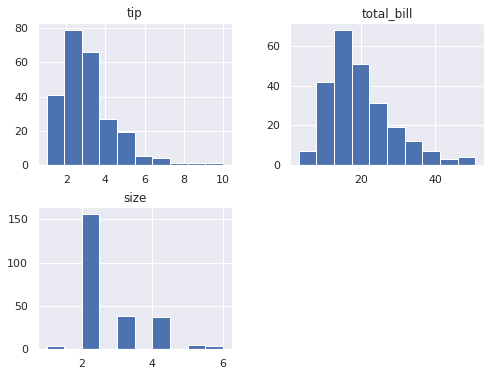

In [ ]:
_ = data[['tip', 'total_bill', 'size']].hist()

We can see that distribution is similar to normal and probably standardization would make it look much better, but we will take care of it later.


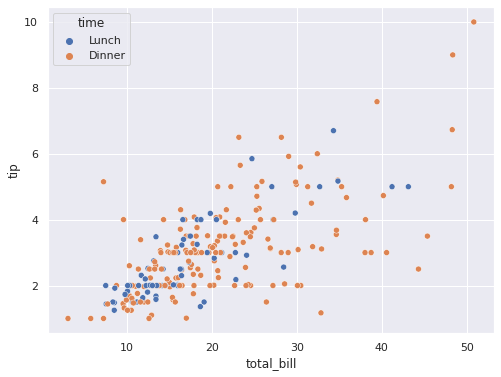

In [ ]:
sns.scatterplot(data = data, x= "total_bill", y = "tip", hue="time")

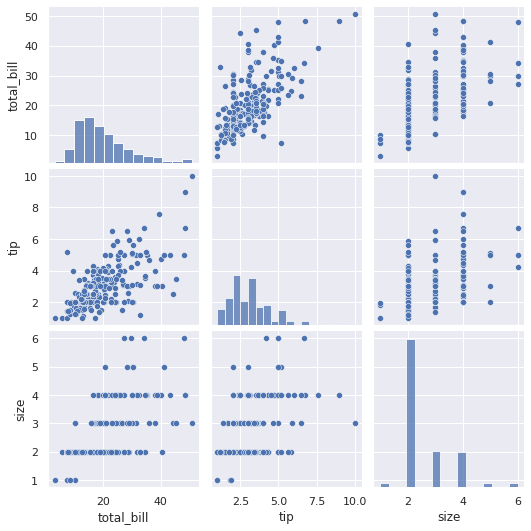

In [ ]:
sns.pairplot(data)

**3.Preprocessing**

OK, we can see through our dataset clearly now. It would be also good to make a use of categorical features. In order to do so, we have to create dummy variables. 
Looking at size variable, we may think at first glance, that we don't need to touch it. But when we look closer, we can see it's a step variable. Maybe in this case would be also good to use label encodng here.
**Let's do this!**

Here I create copy of raw dataset and then I create dummies.

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


data['size'] = label_encoder.fit_transform(data['size'])

data_ = data.copy()

dummy = pd.get_dummies(data[['sex', 'smoker', 'day', 'time']], drop_first=True)

data_ = data_.join(dummy)
dummies = data_.drop(['sex', 'smoker', 'day', 'time'], axis=1)


dummies

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,1,1,1,0,0,1,1
1,10.34,1.66,2,0,1,0,0,1,1
2,21.01,3.50,2,0,1,0,0,1,1
3,23.68,3.31,1,0,1,0,0,1,1
4,24.59,3.61,3,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,2,0,1,0,1,0,1
240,27.18,2.00,1,1,0,0,1,0,1
241,22.67,2.00,1,0,0,0,1,0,1
242,17.82,1.75,1,0,1,0,1,0,1


OK, now we can see, that what I have done works. 


Now, if we managed to get rid of categorical data and we can examine correlation between all of them.


In [ ]:
dummies.corr()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
total_bill,1.000000,0.675734,0.598315,-0.144877,-0.085721,-0.086168,0.054919,0.122953,0.183118
tip,0.675734,1.000000,0.489299,-0.088862,-0.005929,-0.055463,-0.002790,0.125114,0.121629
size,0.598315,0.489299,1.000000,-0.086195,0.133178,-0.142184,-0.041121,0.193054,0.103411
sex_Female,-0.144877,-0.088862,-0.086195,1.000000,0.002816,0.071060,-0.053957,-0.168106,-0.205231
smoker_No,-0.085721,-0.005929,0.133178,0.002816,1.000000,-0.244316,-0.155744,0.181624,-0.054921
day_Fri,-0.086168,-0.055463,-0.142184,0.071060,-0.244316,1.000000,-0.216319,-0.195451,-0.058159
day_Sat,0.054919,-0.002790,-0.041121,-0.053957,-0.155744,-0.216319,1.000000,-0.500682,0.462709
day_Sun,0.122953,0.125114,0.193054,-0.168106,0.181624,-0.195451,-0.500682,1.000000,0.418071
time_Dinner,0.183118,0.121629,0.103411,-0.205231,-0.054921,-0.058159,0.462709,0.418071,1.000000


Here we have correlation matrix, but let's make it more transparent.

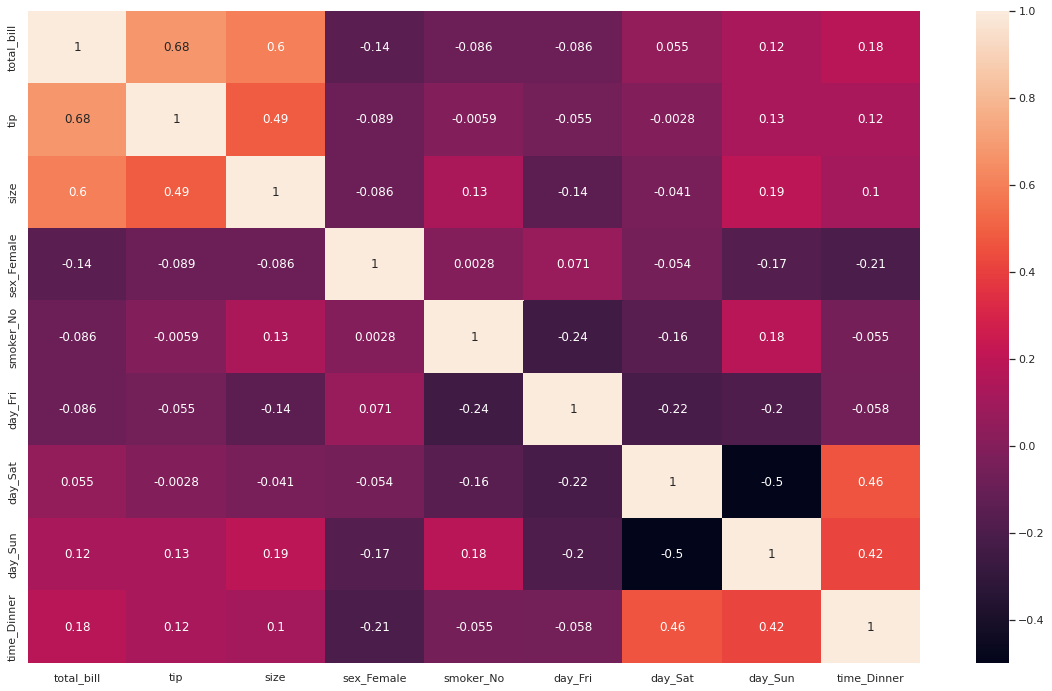

In [ ]:
sns.heatmap(dummies.corr(), annot=True)

sns.set(rc={'figure.figsize':(20,12)})

OK, now if we want to predict future tip, we have to choose correct features.
Heathmap shows us correlation between tip and other variables. Let's see what features we should choose.
To do so, I will print 5 with best correlation with tips.

In [ ]:
dummies.corrwith(dummies["tip"]).abs().nlargest(6)

tip            1.000000
total_bill     0.675734
size           0.489299
day_Sun        0.125114
time_Dinner    0.121629
sex_Female     0.088862
dtype: float64

We can see that features I should choose to my model are: total_bill, size, day_Sun, time_Lunch, time_Dinner

And that is what I am going to do, but before I move forward to creating model. I will check how our data looks after all these processes and if there are some outliers. I am not going to examine dummy variables because there is no point of it.

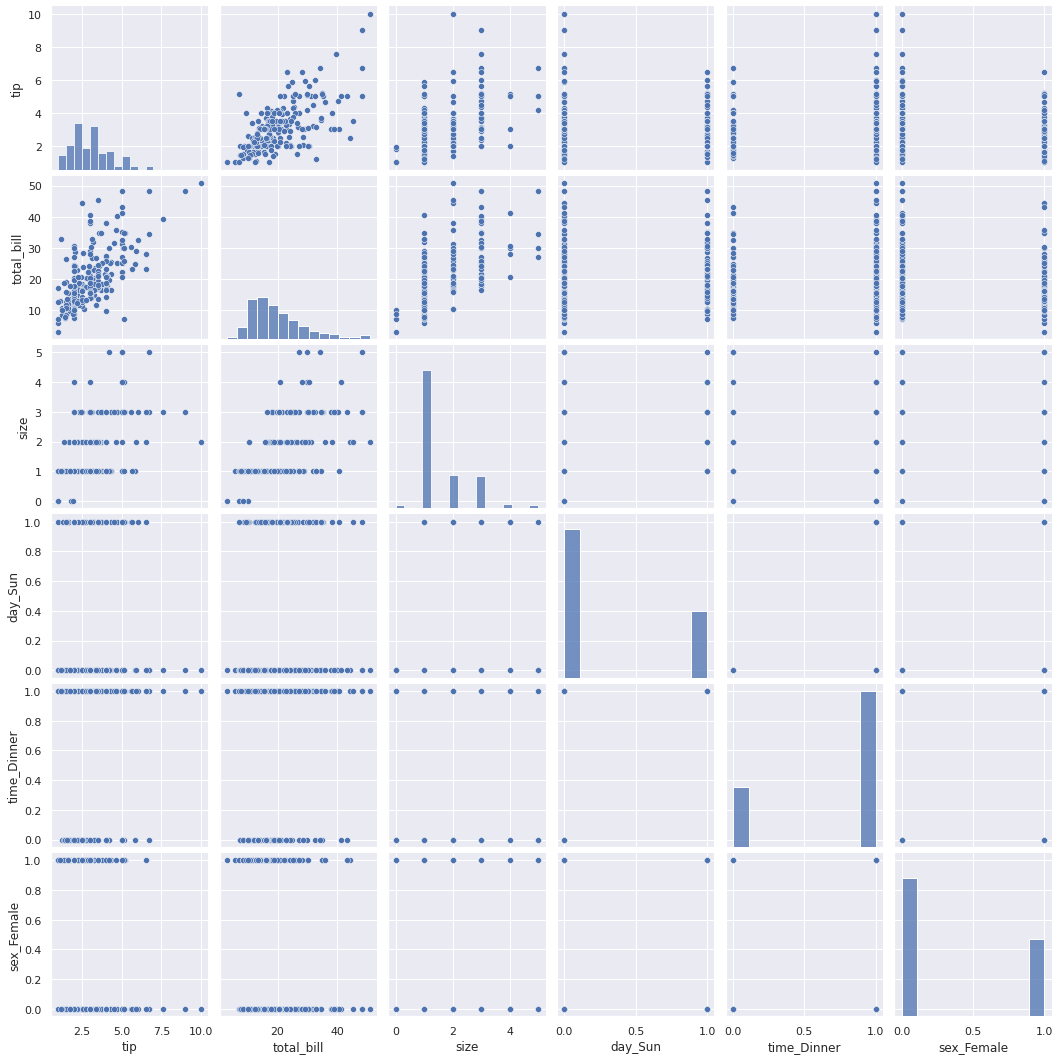

In [ ]:
sns.pairplot(dummies[['tip', 'total_bill', 'size', 'day_Sun', 'time_Dinner', 'sex_Female']])

We can see that distribution looks good, of course there is some skewness, but we can't do better than that.

Looking at scatter plots we can see that there is linearity, which is very good.


**OUTLIERS**

To identify outliers we can use boxplot or z-score. I am going to do both.
Let's start with boxplots

In [ ]:
def z_score(data):
  threshold = 3
  mean = np.mean(data)
  std = np.std(data)

  outlier = []
  for i in data:
    z = (i-mean)/std
    if z > threshold:
      outlier.append(i)
      
  return outlier

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


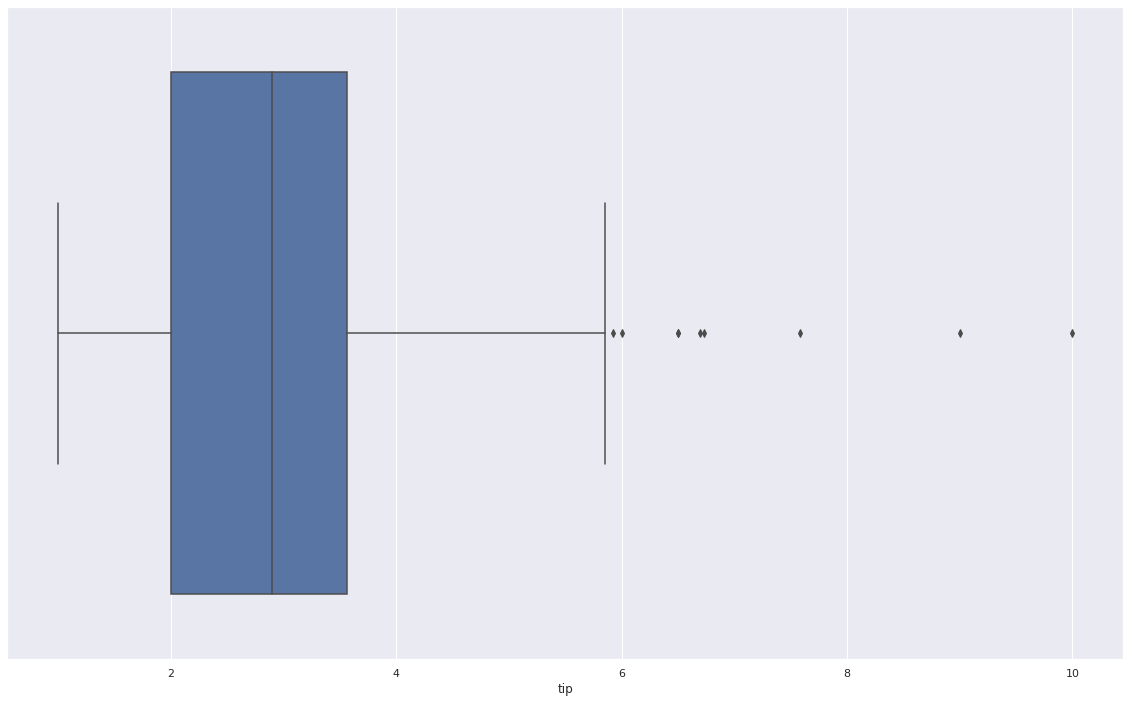

In [ ]:
sns.boxplot(dummies['tip'])

sns.set(rc={'figure.figsize':(8,6)})

In [ ]:
z_score(dummies['tip'])

[7.58, 10.0, 9.0]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


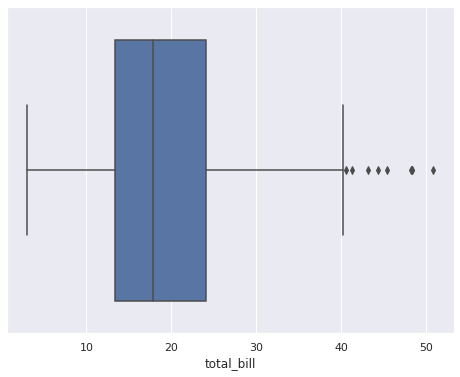

In [ ]:
sns.boxplot(dummies['total_bill'])

sns.set(rc={'figure.figsize':(8,6)})

In [ ]:
z_score(dummies['total_bill'])

[48.27, 48.17, 50.81, 48.33]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


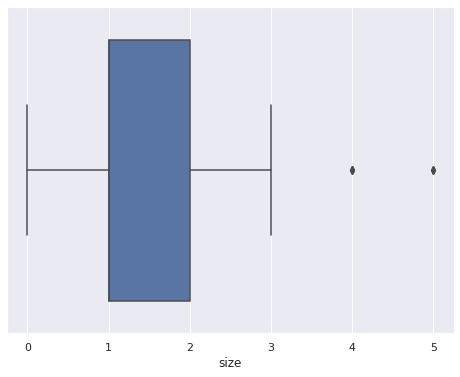

In [ ]:
sns.boxplot(dummies['size'])

sns.set(rc={'figure.figsize':(8,6)})

In [ ]:
z_score(dummies['size'])

[5, 5, 5, 5]

As we can see there are outliers in our features. To get rid of them we can simply replace them with mean or median.


In [ ]:
tip_mean = dummies['tip'].mean()
bill_mean = dummies['total_bill'].mean()
size_mean = dummies['size'].mean()

In [ ]:
for i in dummies['total_bill']:
  if i in z_score(dummies['total_bill']):
    dummies['total_bill'] = dummies['total_bill'].replace([i], bill_mean)

for i in dummies['tip']:
  if i in z_score(dummies['tip']):
    dummies['tip'] = dummies['tip'].replace([i], tip_mean)

for i in dummies['size']:
  if i in z_score(dummies['size']):
    dummies['size'] = dummies['size'].replace([i], size_mean)

In [ ]:
print(z_score(dummies['total_bill']))
print(z_score(dummies['size']))
print(z_score(dummies['tip']))


[]
[]
[]


**4. Regression Model**

# OLS

Now if we managed to take care of everything (we cleaned our data, standardized them, create dummies) we can move to the next part. Creating Regression Model.
Before we train our data, we have to split it in two parts training set and test set.
To do so I am going to use scikit-learn library.

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X = dummies[['total_bill', 'size', 'sex_Female', 'smoker_No', 'day_Fri',
       'day_Sat', 'day_Sun', 'time_Dinner']]
Y = dummies['tip']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)
X_train = sm.add_constant(X_train, prepend=False)

Here we add polynomial features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly_x = poly.fit_transform(X_train[['total_bill']])

poly_x


We splited our dataset into train and test, and also we created polynomial features. Now we can put it into the regression model.
For regression model I use statsmodels library.

In [ ]:
model = sm.OLS(Y_train, X_train)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     13.10
Date:                Sun, 25 Dec 2022   Prob (F-statistic):           1.79e-14
Time:                        13:27:11   Log-Likelihood:                -216.29
No. Observations:                 170   AIC:                             450.6
Df Residuals:                     161   BIC:                             478.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
total_bill      0.0784      0.011      7.104      



---


---




Summary shows R2 relatively low, which means our models doesn't explain our data in most cases.






Let's see what we can do about it.

<ipython-input-123-45e288f29782>:2: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout(pad=50)


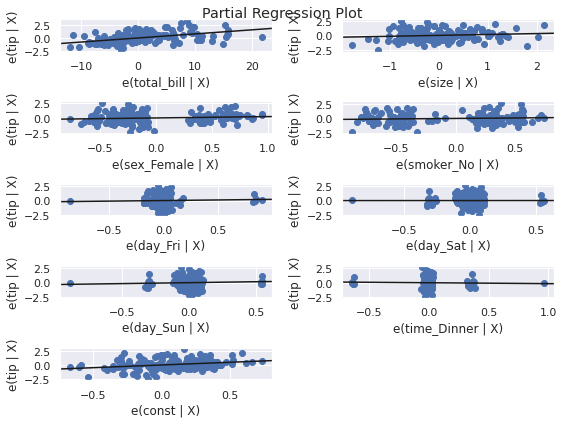

In [ ]:
fig = sm.graphics.plot_partregress_grid(result)
fig.tight_layout(pad=50)

Let's check assumptions

Residuals plot

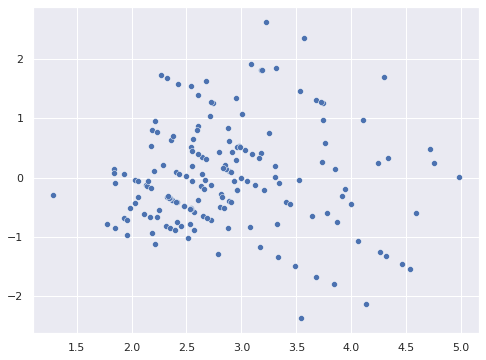

In [ ]:
sns.scatterplot(x=result.predict(X_train), y=result.resid)

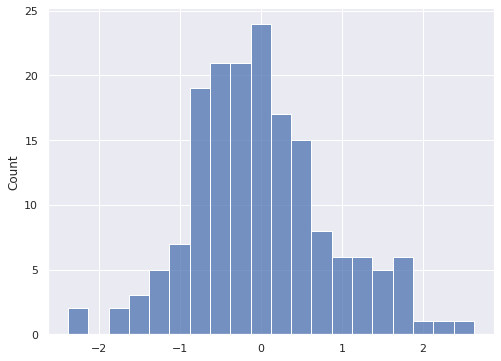

In [ ]:
resid = result.resid
sns.histplot(resid, bins=20)

In [ ]:
from scipy import stats
shapiro_test = stats.shapiro(result.resid)
shapiro_test

ShapiroResult(statistic=0.9830095171928406, pvalue=0.0358649417757988)

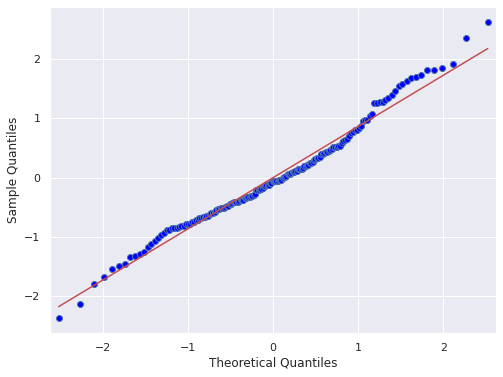

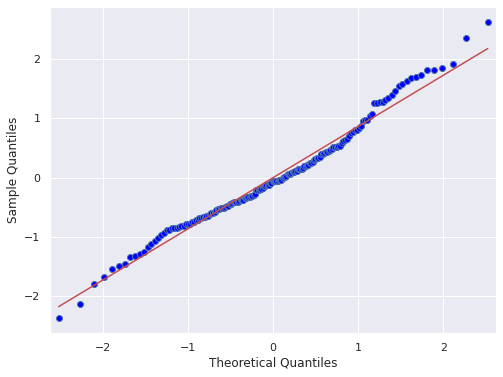

In [ ]:
import statsmodels.api as sm
sm.qqplot(result.resid,line='s')

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white

white_test = het_white(result.resid,  result.model.exog)

labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

print(dict(zip(labels, white_test)))

{'LM Statistic': 58.29440277716909, 'LM-Test p-value': 0.0021326099378711763, 'F-Statistic': 2.323107543761017, 'F-Test p-value': 0.00048126267092469735}


To improve our model I will use yeo-johnson transformation on features, maybe this will help.



**5. Yeo-Johnson transformation**

In the transformation I will not put unsignificant features, because I don't see any reason of doing this.

In [ ]:
from sklearn.preprocessing import power_transform

transformed = pd.DataFrame(power_transform(dummies[['total_bill', 'tip']], method='yeo-johnson'), columns=['total_bill', 'tip'])

transformed

,total_bill,tip
0,-0.130065,-2.187399
1,-1.286371,-1.174307
2,0.408113,0.679405
3,0.722977,0.529587
4,0.823989,0.763099
...,...,...
239,1.278777,2.151987
240,1.096375,-0.744804
241,0.607272,-0.744804
242,-0.011496,-1.055170


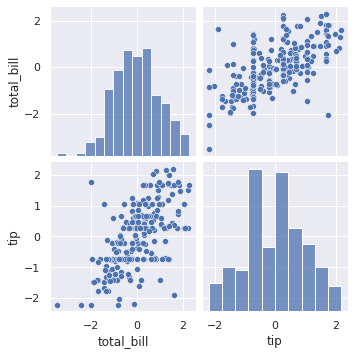

In [ ]:
sns.pairplot(transformed)

I want to keep everything clear here, and to be easy to understand that's why I have to repeat myself. Of course I don't recomend doing this in every day practice.

OK, let's go.

In [ ]:
transformed = transformed.join(X_train[['sex_Female', 'smoker_No', 'day_Fri',
       'day_Sat', 'day_Sun', 'time_Dinner', 'size']])

transformed = transformed.dropna()

In [ ]:
from sklearn.model_selection import train_test_split
X = transformed[['total_bill', 'size',  'sex_Female', 'smoker_No', 'day_Fri',
       'day_Sat', 'day_Sun', 'time_Dinner']]
Y = transformed['tip']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)

X_train = sm.add_constant(X_train, prepend=False)

In [ ]:
import statsmodels.api as sm

model = sm.OLS(Y_train, X_train)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     11.17
Date:                Sun, 25 Dec 2022   Prob (F-statistic):           1.96e-11
Time:                        13:29:46   Log-Likelihood:                -131.31
No. Observations:                 118   AIC:                             280.6
Df Residuals:                     109   BIC:                             305.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
total_bill      0.6469      0.085      7.632      

It seems that box-cox/yeo-johnson transformation didn't help here.
It seems our data is normaly distributed enough and linearity can't be better than it is, that's why our model's R score almost hasn't changed.


I think that's all we can do here, let's check Regression assumption, if they're alright we can end.

<ipython-input-149-add110cccf8f>:2: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout(pad=12.0)


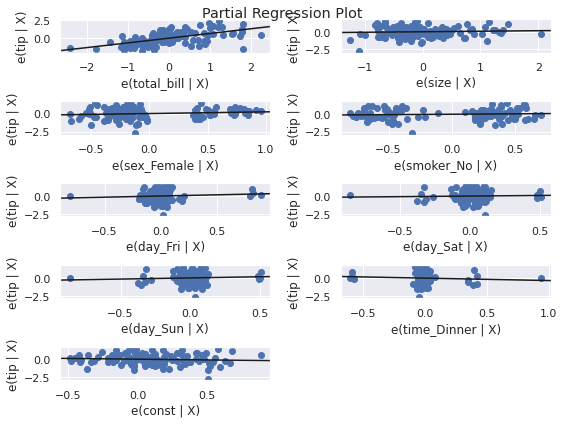

In [ ]:
fig = sm.graphics.plot_partregress_grid(result)
fig.tight_layout(pad=12.0)

**6.Model assumptions**

At the beginning scatterplot of residuals.

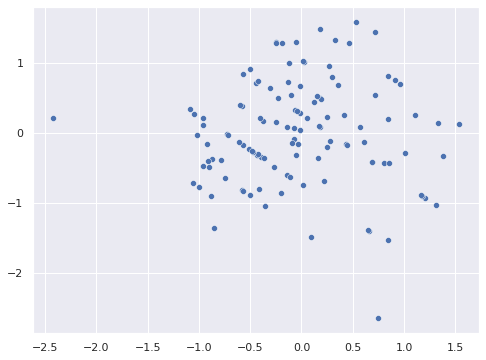

In [ ]:
sns.scatterplot(x=result.predict(X_train), y=result.resid)

Just by looking at this, we can expect heteroscedascity

1. residuals are normally distributed

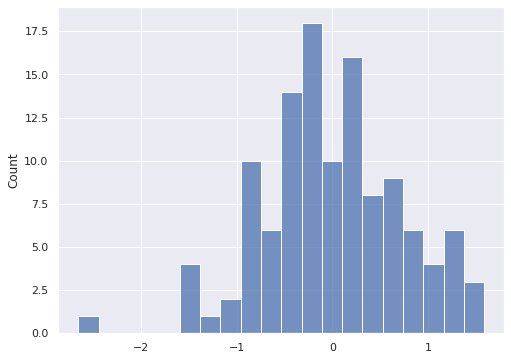

In [ ]:
resid = result.resid
sns.histplot(resid, bins=20)

In [ ]:
from scipy import stats
shapiro_test = stats.shapiro(result.resid)
shapiro_test

ShapiroResult(statistic=0.9852107167243958, pvalue=0.2242068648338318)

pvalue > 0.05, so we have no reason to reject null hipothesis

Residuals are normaly distributed, just to be sure we can have a test for distribution.

2. Homoscedascity

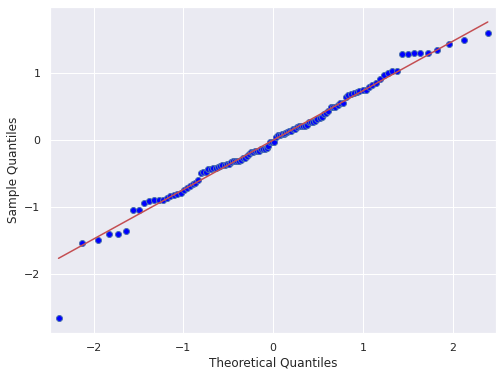

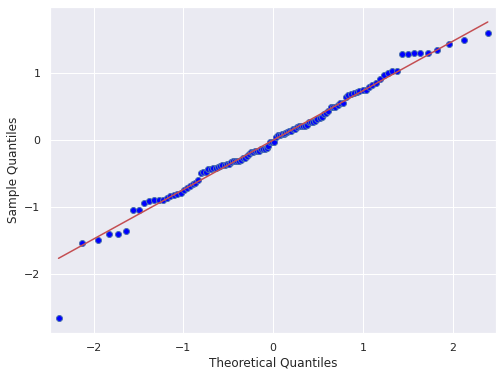

In [ ]:
import statsmodels.api as sm
sm.qqplot(result.resid,line='s')

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white

white_test = het_white(result.resid,  result.model.exog)

labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

print(dict(zip(labels, white_test)))

{'LM Statistic': 41.629837476695066, 'LM-Test p-value': 0.09623395607860087, 'F-Statistic': 1.5122296814938483, 'F-Test p-value': 0.06970472902506455}



It appears there is heteroscedascity.  

3. No autocorrelation of residuals

Prefered Durbin-Watson value is between 1.50 and 2.50. Our value is in the range, so there is no first-order autocorrelation.



---


**Summary:  Looking at diagnostics we can say, that probably OLS is not the best choice in this case. In next step I will try to use different estimator, which is Weighted Least Squares (WLS).**


---



# Weighted Least Squares





First we need to calcuate weights. 

In [ ]:
weights = 1/(result.fittedvalues)**2


In [ ]:


wls_model = sm.WLS(Y_train, X_train, weights)
result_wls = wls_model.fit() 
print(result_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.785
Model:                            WLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     49.77
Date:                Sun, 25 Dec 2022   Prob (F-statistic):           6.01e-33
Time:                        13:30:22   Log-Likelihood:                -226.49
No. Observations:                 118   AIC:                             471.0
Df Residuals:                     109   BIC:                             495.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
total_bill      0.8049      0.306      2.634      

Ok r-score is pretty high (0.78) here, if assumptions are confirmed, this would be great. **Let's look.**


<ipython-input-158-823237c01706>:2: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout(pad=12.0)


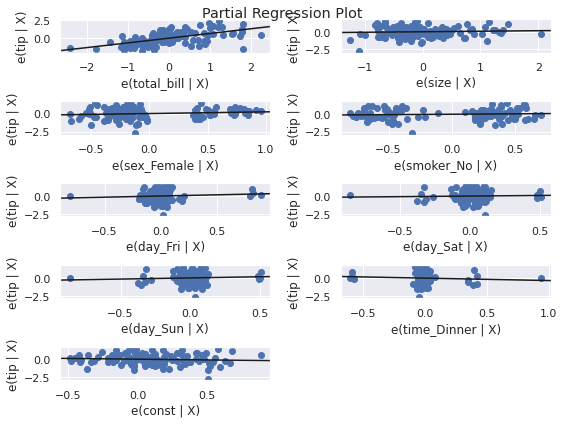

In [ ]:
fig = sm.graphics.plot_partregress_grid(result_wls)
fig.tight_layout(pad=12.0)

Now, diagnostics.

Residuals plot.

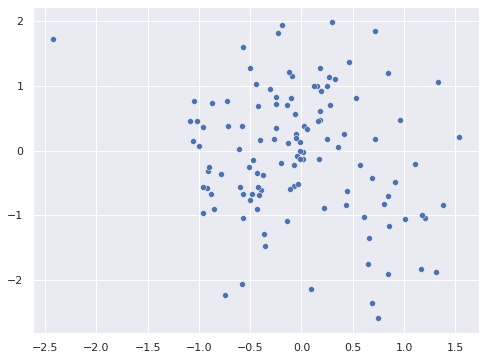

In [ ]:
sns.scatterplot(x=result.predict(X_train), y=result_wls.resid)

1. Normal distribution of residuals

ShapiroResult(statistic=0.9883431792259216, pvalue=0.4108697474002838)


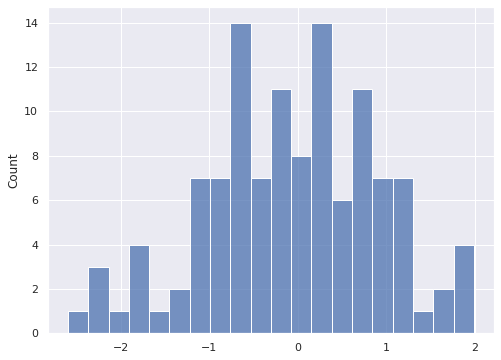

In [ ]:
resid = result_wls.resid
sns.histplot(resid, bins=20)

from scipy import stats
shapiro_test = stats.shapiro(result_wls.resid)
print(shapiro_test)

Residuals are normally distributed.


2. Homoscedascity

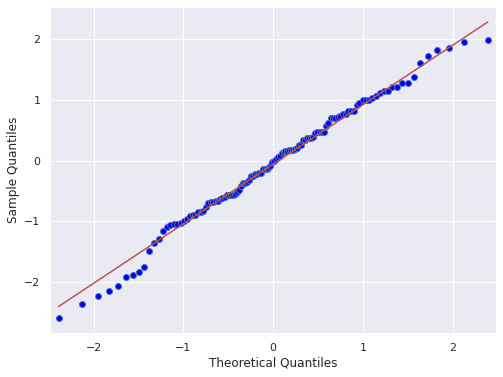

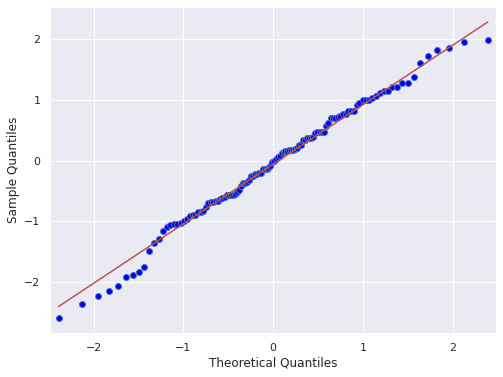

In [ ]:
import statsmodels.api as sm
sm.qqplot(result_wls.resid,line='s')

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white

white_test = het_white(result_wls.resid,  result_wls.model.exog)

labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

print(dict(zip(labels, white_test)))

{'LM Statistic': 65.12123383558354, 'LM-Test p-value': 0.000322206761552338, 'F-Statistic': 3.416473565361924, 'F-Test p-value': 3.801294885600663e-06}


We have heteroscedascity here.
As we can see, second assumption is not confirmed and we can not accept this model.

3. Autocorrelation

In [ ]:
sms.stattools.durbin_watson(result_wls.resid)

1.873161449038847

It seems there is no autocorrelation.


---


**Summary: It appears our model is still not good enough.
Let's look at GLS.


---

# GLS

At the beginning we need to define sigma parameter. Then we can put everythink into model as usual.

First we get residuals from our OLS model and we pu them into new LR model.

In [ ]:
resid = result.resid 

x_res = sm.add_constant(resid[:-1])
y_res = resid[1:]
ols_2 = sm.OLS(y_res.to_numpy().reshape(-1,1), x_res)
result_ols_2 = ols_2.fit()


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Then we have to define sigma parameter. 

In [ ]:
rho = result_ols_2.params[0]


from scipy.linalg import toeplitz

toeplitz(range(5))
order = toeplitz(range(len(resid)))
     

sigma = rho**order

In [ ]:


gls_model = sm.GLS(Y_train, X_train, sigma=sigma)
gls_results = gls_model.fit()
     
print(gls_results.summary())

                            GLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.465
Model:                            GLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     11.83
Date:                Sun, 25 Dec 2022   Prob (F-statistic):           5.14e-12
Time:                        13:31:09   Log-Likelihood:                -130.70
No. Observations:                 118   AIC:                             279.4
Df Residuals:                     109   BIC:                             304.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
total_bill      0.6518      0.084      7.765      

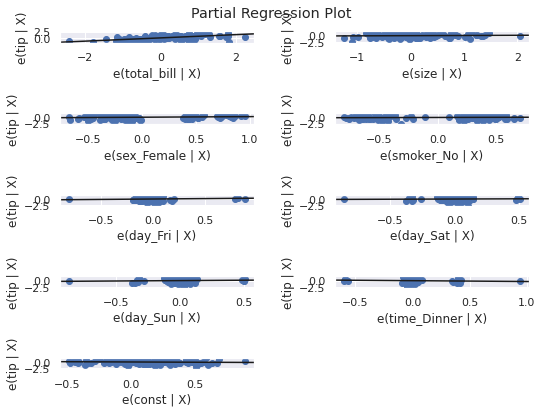

In [ ]:
fig = sm.graphics.plot_partregress_grid(gls_results)
fig.tight_layout(pad=2.0)

Ok, we can see our summary. Let's examine our model.

Residuals scatterplot.

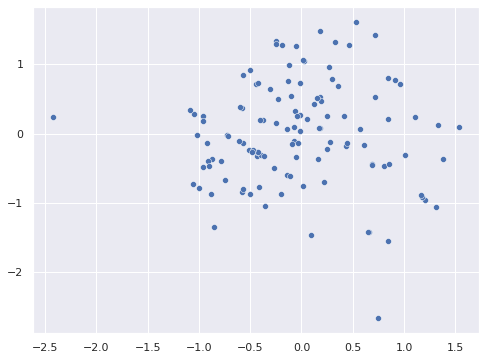

In [ ]:
sns.scatterplot(x=result.predict(X_train), y=gls_results.resid)

1. Normal distribution of residuals

ShapiroResult(statistic=0.9854867458343506, pvalue=0.23703019320964813)


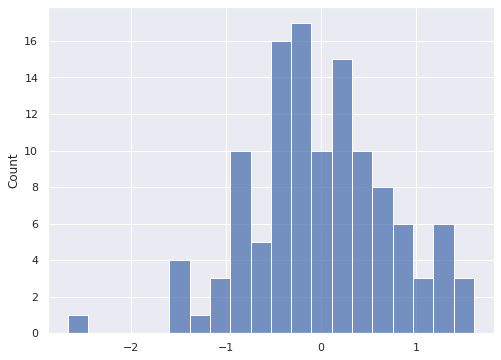

In [ ]:
resid = gls_results.resid
sns.histplot(resid, bins=20)

from scipy import stats
shapiro_test = stats.shapiro(gls_results.resid)
print(shapiro_test)

Residuals are normally distributed.

2. Homoskedascity

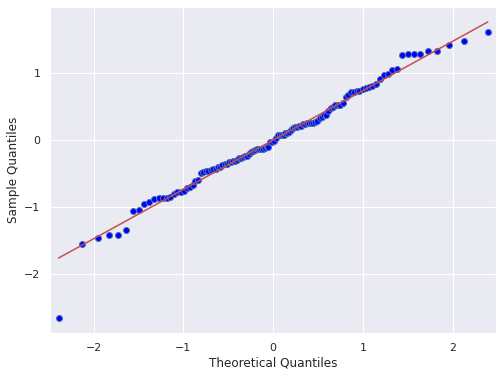

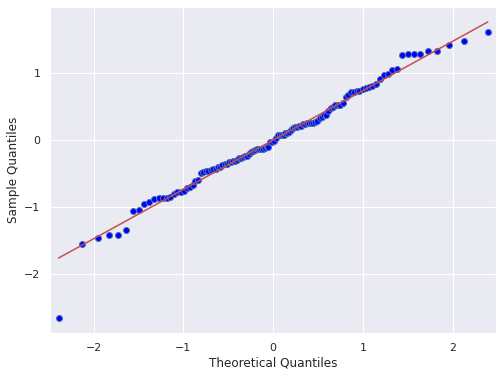

In [ ]:
import statsmodels.api as sm
sm.qqplot(gls_results.resid,line='s')

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white

white_test = het_white(gls_results.resid,  gls_results.model.exog)

labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

print(dict(zip(labels, white_test)))

{'LM Statistic': 41.809566977176694, 'LM-Test p-value': 0.09307563130883781, 'F-Statistic': 1.5223411439884709, 'F-Test p-value': 0.06658803490600604}


Heteroskedastic

3. Autocorrelation

In [ ]:
sms.stattools.durbin_watson(gls_results.resid)

1.8459948775550938

There is no first order autocorrelation.

# Summary


---
Let's summarize what we have done.


1.  We cleared our dataset, we transformed categorical variables into dummies, and step variables into labels.
2.  We managed to find correlation between our dependent variable (tips) and independent variables (total bill, smoker, sex etc.)
3.  We get rid of outliers, by replacing them with mean.
4.  We created polynomial features.
5. Yet our model using OLS didn't met homoscedasticity assumption and r-scored was pretty low.
6. So we've tried yeo-johnson transformation, because we have also negative data. Unfortunetly that didn't help too.
7. We decided to use WLS, to get rid of heteroskedascity. Our model here reached 0.78 r-score which is satisfying. But still heteroscedascity appeard.
8. At the end we tried using GLS estimator, which managed to confirm all assumptions, but r-score was not high enough to consider this model useful.


**Conculsion:**

It appears linear modeling is not good for this case. Maybe we should try some non-linear model here. We will take care of it in next part.

---



